In [790]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt

In [791]:
df = pd.read_csv('takehome_users.csv', encoding='latin-1')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [792]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [793]:
df["active"] = False

In [794]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [795]:
df_eng = pd.read_csv('takehome_user_engagement.csv', parse_dates=True)
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [796]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [797]:
df_week = df_eng
df_week.drop(['visited'], axis=1, inplace=True)
df_week['date']= pd.to_datetime(df_week['time_stamp']).dt.date
df_week.drop(['time_stamp'], axis=1, inplace=True)
df_week.head()

,user_id,date
0,1,2014-04-22
1,2,2013-11-15
2,2,2013-11-29
3,2,2013-12-09
4,2,2013-12-25


In [798]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  207917 non-null  int64 
 1   date     207917 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.2+ MB


In [799]:
df_week = df_week.drop_duplicates()

In [800]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  207917 non-null  int64 
 1   date     207917 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.8+ MB


In [801]:
df_week.groupby(['user_id','date']).size()

user_id  date      
1        2014-04-22    1
2        2013-11-15    1
         2013-11-29    1
         2013-12-09    1
         2013-12-25    1
                      ..
11996    2013-09-06    1
11997    2013-01-15    1
11998    2014-04-27    1
11999    2012-06-02    1
12000    2014-01-26    1
Length: 207917, dtype: int64

In [802]:
s = df_week.groupby(['user_id']).count()
s['counts'] = s['date']
s.drop(['date'], axis=1, inplace=True)

In [803]:
s[s['counts']<3].counts.value_counts()

1    6235
2     340
Name: counts, dtype: int64

In [804]:
s = s[s['counts']<3]

In [805]:
df_week = df_week[~df_week['user_id'].isin(s.index)]

In [806]:
df_week.head()

,user_id,date
1,2,2013-11-15
2,2,2013-11-29
3,2,2013-12-09
4,2,2013-12-25
5,2,2013-12-31


In [807]:
test_users = df_week.user_id.unique()
for i in test_users:
    dates = df_week[df_week['user_id'] == i].date.values.tolist()
    for d in range(0,len(dates)-2):
        if((dates[d+2] - dates[d]) <= timedelta(days=7)):
            df['active'][i-1] = True
            break

/home/niteesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [808]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [809]:
df.active.value_counts()

False    10344
True      1656
Name: active, dtype: int64

In [810]:
df['email'] = df['email'].apply(lambda x: x[x.find('@')+1:])
df['email'].value_counts()[:8]

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
mumdc.com            2
xybhi.com            2
Name: email, dtype: int64

In [811]:
emails = ['gmail.com', 'yahoo.com', 'jourrapide.com', 'cuvox.de', 'gustr.com', 'hotmail.com']
df['email'] = df['email'].apply(lambda x: 'random' if x not in emails else x[:x.find('.')])

In [812]:
df['email'].value_counts()[:8]

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
random        1186
gustr         1179
hotmail       1165
Name: email, dtype: int64

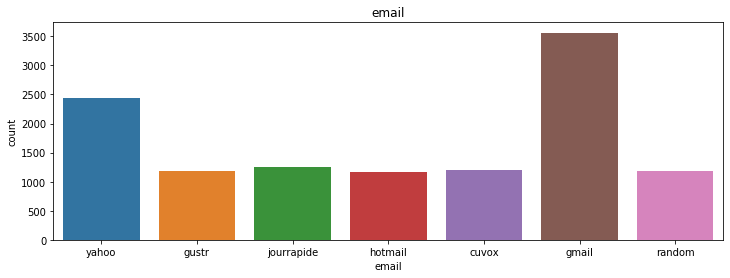

email       active
cuvox       False     1058
            True       144
gmail       False     3005
            True       557
gustr       False     1029
            True       150
hotmail     False      960
            True       205
jourrapide  False     1089
            True       170
random      False     1023
            True       163
yahoo       False     2180
            True       267
Name: active, dtype: int64


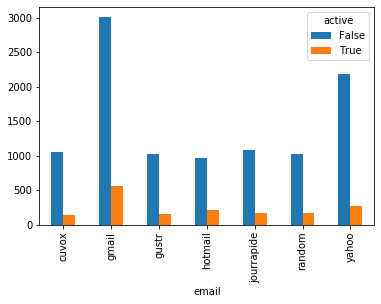

In [813]:
plt.figure(figsize=(12,4))
sns.countplot(x='email', data=df).set_title("email")
plt.show()
df.groupby(['active'])['email'].value_counts().unstack(0).plot.bar()
print(df.groupby(['email'])['active'].value_counts())

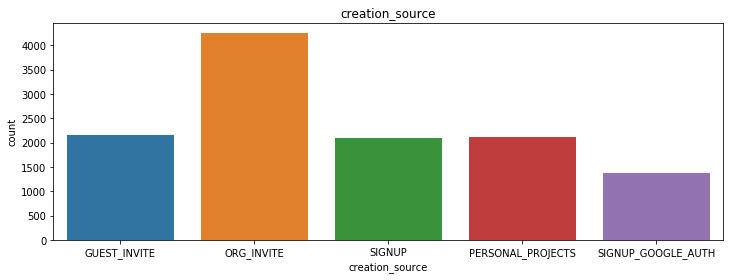

creation_source     active
GUEST_INVITE        False     1794
                    True       369
ORG_INVITE          False     3680
                    True       574
PERSONAL_PROJECTS   False     1939
                    True       172
SIGNUP              False     1785
                    True       302
SIGNUP_GOOGLE_AUTH  False     1146
                    True       239
Name: active, dtype: int64


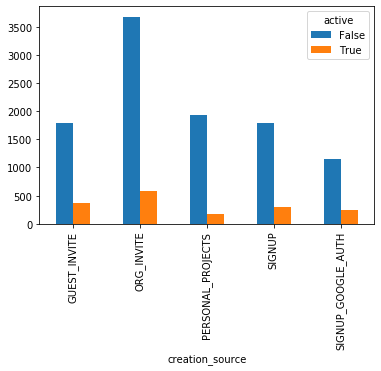

In [814]:
plt.figure(figsize=(12,4))
sns.countplot(x='creation_source', data=df).set_title("creation_source")
plt.show()
df.groupby(['active'])['creation_source'].value_counts().unstack(0).plot.bar()
print(df.groupby(['creation_source'])['active'].value_counts())

opted_in_to_mailing_list  active
0                         False     7779
                          True      1227
1                         False     2565
                          True       429
Name: active, dtype: int64


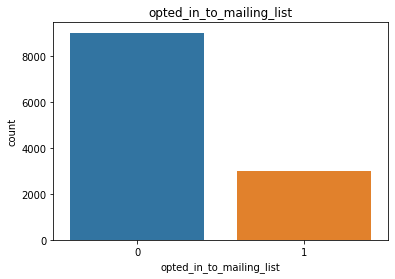

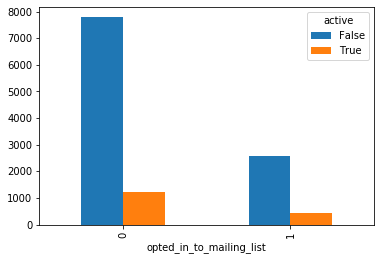

In [815]:
sns.countplot(x='opted_in_to_mailing_list', data=df).set_title("opted_in_to_mailing_list")
df.groupby(['active'])['opted_in_to_mailing_list'].value_counts().unstack(0).plot.bar()
print(df.groupby(['opted_in_to_mailing_list'])['active'].value_counts())

enabled_for_marketing_drip  active
0                           False     8809
                            True      1399
1                           False     1535
                            True       257
Name: active, dtype: int64


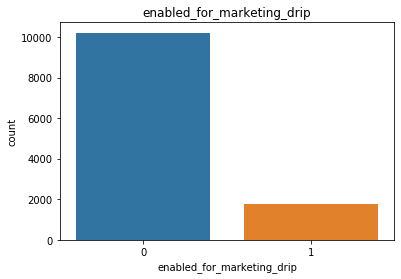

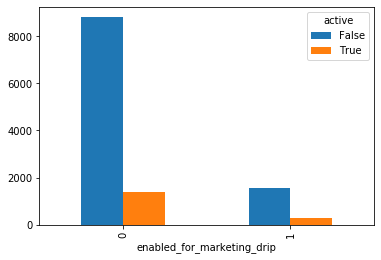

In [816]:
sns.countplot(x='enabled_for_marketing_drip', data=df).set_title("enabled_for_marketing_drip")
df.groupby(['active'])['enabled_for_marketing_drip'].value_counts().unstack(0).plot.bar()
print(df.groupby(['enabled_for_marketing_drip'])['active'].value_counts())

In [817]:
df['invited_by_user_id'].value_counts().head()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
Name: invited_by_user_id, dtype: int64

In [818]:
df.org_id.value_counts()[:10]

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
Name: org_id, dtype: int64

In [819]:
df = df.drop(['org_id', 'invited_by_user_id'], axis=1)

In [820]:
# Number of days after creation too last session
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'], unit ='s')

In [821]:
df['days_active'] = df['last_session_creation_time'] - df['creation_time']
df['days_active'] = df['days_active'].dt.days

In [822]:
df['days_inactive'] = max(df['creation_time']) - df['last_session_creation_time']
df['days_inactive'] = df['days_inactive'].dt.days

In [823]:
df = df.drop([ 'last_session_creation_time','creation_time'], axis=1)

In [824]:
df.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,active,days_active,days_inactive
0,1,Clausen August,yahoo,GUEST_INVITE,1,0,False,0.0,38.0
1,2,Poole Matthew,gustr,ORG_INVITE,0,0,True,136.0,60.0
2,3,Bottrill Mitchell,gustr,ORG_INVITE,0,0,False,0.0,437.0
3,4,Clausen Nicklas,yahoo,GUEST_INVITE,0,0,False,1.0,373.0
4,5,Raw Grace,yahoo,GUEST_INVITE,0,0,False,5.0,493.0


In [825]:
df = df.drop(['name', 'object_id'], axis=1)

In [826]:
df.head()

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,active,days_active,days_inactive
0,yahoo,GUEST_INVITE,1,0,False,0.0,38.0
1,gustr,ORG_INVITE,0,0,True,136.0,60.0
2,gustr,ORG_INVITE,0,0,False,0.0,437.0
3,yahoo,GUEST_INVITE,0,0,False,1.0,373.0
4,yahoo,GUEST_INVITE,0,0,False,5.0,493.0


In [827]:
df['days_active'] = df['days_active'].fillna(df['days_active'].mean())
df['days_inactive'] = df['days_inactive'].fillna(df['days_inactive'].mean())

In [828]:
df_rf = pd.get_dummies(df, columns = ['email', 'creation_source'], drop_first=True)

In [829]:
X = df_rf.drop('active', axis=1)
y = df_rf['active']

In [830]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            12000 non-null  int64  
 1   enabled_for_marketing_drip          12000 non-null  int64  
 2   days_active                         12000 non-null  float64
 3   days_inactive                       12000 non-null  float64
 4   email_gmail                         12000 non-null  uint8  
 5   email_gustr                         12000 non-null  uint8  
 6   email_hotmail                       12000 non-null  uint8  
 7   email_jourrapide                    12000 non-null  uint8  
 8   email_random                        12000 non-null  uint8  
 9   email_yahoo                         12000 non-null  uint8  
 10  creation_source_ORG_INVITE          12000 non-null  uint8  
 11  creation_source_PERSONAL_PROJECTS   12000

In [831]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(X_train.shape)
print(X_test.shape)

(9600, 14)
(2400, 14)


In [832]:
sc = StandardScaler()
X_train.loc[:,["days_active","days_inactive"]] = sc.fit_transform(X_train[["days_active","days_inactive"]])
X_test.loc[:,["days_active","days_inactive"]] = sc.transform(X_test[["days_active","days_inactive"]])

/home/niteesh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/niteesh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [833]:
X_train.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,days_active,days_inactive,email_gmail,email_gustr,email_hotmail,email_jourrapide,email_random,email_yahoo,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
7917,0,0,-0.478825,1.821473,0,0,0,0,1,0,1,0,0,0
4522,0,0,-0.462699,-0.288501,0,1,0,0,0,0,0,0,0,0
7805,1,0,-0.277259,1.313420,0,0,1,0,0,0,0,0,0,0
11793,0,0,-0.478825,0.183262,1,0,0,0,0,0,1,0,0,0
801,0,0,-0.478825,0.934973,1,0,0,0,0,0,0,0,0,1


In [834]:
X_test.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,days_active,days_inactive,email_gmail,email_gustr,email_hotmail,email_jourrapide,email_random,email_yahoo,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
472,0,0,-0.478825,1.214920,0,0,0,0,0,0,1,0,0,0
2274,0,0,-0.001338,0.005040,0,0,0,1,0,0,1,0,0,0
4997,0,0,-0.478825,0.592815,0,0,0,0,0,1,0,0,1,0
305,0,0,-0.001338,0.005040,0,0,0,0,0,1,0,1,0,0
10438,0,0,-0.470762,-1.232027,0,0,1,0,0,0,0,0,0,0


In [835]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [836]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print(cv_scores)

[0.971875   0.971875   0.96875    0.9765625  0.97291667]


In [837]:
n = [20,40,80,160,240]
features = [8, 11, 14, 'auto']
oob = [True, False]
param_grid = {'n_estimators': n, 'max_features': features, 'oob_score': oob}

In [838]:
# evluation of the model
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(
    random_state=42, class_weight='balanced', n_estimators=100
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy of test set was', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of test set was 0.9683333333333334
              precision    recall  f1-score   support

       False       0.98      0.99      0.98      2069
        True       0.90      0.86      0.88       331

    accuracy                           0.97      2400
   macro avg       0.94      0.92      0.93      2400
weighted avg       0.97      0.97      0.97      2400



In [839]:
cv = GridSearchCV(clf, param_grid, cv=5) 
cv.fit(X_train, y_train)
y_predict = cv.predict(X_test) 

/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: So

/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [840]:
print("Best Parameter: ", cv.best_params_)
print("Best Score: ", cv.best_score_)


Best Parameter:  {'max_features': 'auto', 'n_estimators': 240, 'oob_score': True}
Best Score:  0.9727083333333333


In [841]:
cv.predict(X_test)

array([False, False, False, ..., False, False, False])

In [842]:
print(classification_report(y_test, cv.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

       False       0.98      0.99      0.98      2069
        True       0.90      0.86      0.88       331

    accuracy                           0.97      2400
   macro avg       0.94      0.92      0.93      2400
weighted avg       0.97      0.97      0.97      2400



In [843]:
print("Test Accuracy ", accuracy_score(y_test, y_predict))

Test Accuracy  0.9679166666666666


In [844]:
confusion_matrix(y_test, y_predict)

array([[2038,   31],
       [  46,  285]])

In [845]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Text(0.5, 1.0, 'ROC Curve')

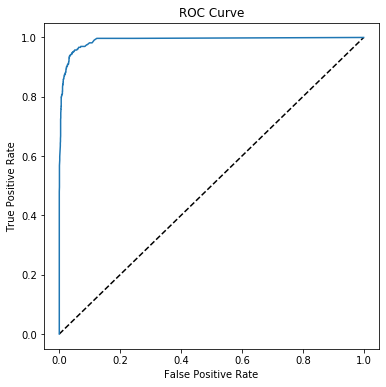

In [846]:
y_pred = cv.best_estimator_.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [847]:
print("AUC:",roc_auc_score(y_test, y_pred))

AUC: 0.990140018310873


In [848]:
features = pd.DataFrame(list(zip(X.columns, cv.best_estimator_.feature_importances_)), columns = ['Feature', 'Importance'])
features.sort_values(by='Importance', ascending=False)

,Feature,Importance
2,days_active,0.685367
3,days_inactive,0.276639
11,creation_source_PERSONAL_PROJECTS,0.006963
0,opted_in_to_mailing_list,0.004222
1,enabled_for_marketing_drip,0.003818
10,creation_source_ORG_INVITE,0.003534
12,creation_source_SIGNUP,0.003283
4,email_gmail,0.002982
9,email_yahoo,0.002555
13,creation_source_SIGNUP_GOOGLE_AUTH,0.002497


In [853]:
print("Percentage of adopted users is",(df.active.value_counts()[1])/(df.active.value_counts()[1] + df.active.value_counts()[0])*100,"%")

Percentage of adopted users is 13.8 %


Last timestamp active is the most important feature.

Our feature engineering included days_active which is the number of days between last active and date of account creation.

The next important feature is number of days since last session login.

The other features are negligible